In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from iminuit import Minuit
import sys
from scipy.special import erfc
from scipy import stats
from sympy import *
import pandas as pd

np.random.seed(8)

sys.path.append('AppStat2023/External_Functions')
from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH
from ExternalFunctions import nice_string_output, add_text_to_ax # useful functions to print fit results on figure

In [2]:
from IPython.core.display import Latex

def lprint(*args,**kwargs):
    """Pretty print arguments as LaTeX using IPython display system 
    
    Parameters
    ----------
    args : tuple 
        What to print (in LaTeX math mode)
    kwargs : dict 
        optional keywords to pass to `display` 
    """
    display(Latex('$$'+' '.join(args)+'$$'),**kwargs)

In [3]:
def fit_and_plot(f, x, y, sy, par_guess, labels):
    """Function for making and plotting a chi2-fit."""
    
    Minuit.print_level = 1

    chi2fit = Chi2Regression(f, x, y, sy)

    minuit_chi2 = Minuit(chi2fit, **par_guess)
    minuit_chi2.errordef = 1.0     # This is the definition for ChiSqaure fits
    minuit_chi2.migrad()           # This is where the minimisation is carried out! Put ";" at the end to void output


    for name in minuit_chi2.parameters :
        value, error = minuit_chi2.values[name], minuit_chi2.errors[name]
        print(f"Fit value: {name} = {value:.5f} +/- {error:.5f}")

    # Get Chi2 value:
    chi2_value = minuit_chi2.fval            # The value minimised, i.e. Chi2 or -2*LogLikeliHood (LLH) value

    # Get number of degrees-of-freedom (Ndof):
    Ndof_value = len(y) - minuit_chi2.nfit

    Prob_value = stats.chi2.sf(chi2_value, Ndof_value) # The chi2 probability given N_DOF degrees of freedom
    print(f"Chi2 value: {chi2_value:.1f}   Ndof = {Ndof_value:.0f}    Prob(Chi2,Ndof) = {Prob_value}")

    fig, ax = plt.subplots(figsize=(9, 6))  # figsize is in inches
    ax.errorbar(x, y, yerr=sy, label='Data', fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)

    # Set the figure texts; xlabel, ylabel and title.
    ax.set(xlabel=f"{labels[0]}", # the label of the y axis
        ylabel=f"{labels[1]}",  # the label of the y axis
        title=f"{labels[2]}")

    # Adding fit function to plot:
    x_axis = np.linspace(np.min(x), np.max(x), 1000)
    ax.plot(x_axis, f(x_axis, *minuit_chi2.values[:]), '-r', label='Chi2 fit model result') 

    # Adding fit results to plot:
    d = {'Chi2':     minuit_chi2.fval  ,
        'ndf':      len(y)-minuit_chi2.nfit,
        'Prob':     stats.chi2.sf(minuit_chi2.fval, len(y)-minuit_chi2.nfit),
        }
    
    text = nice_string_output(d, extra_spacing=2, decimals=3)
    add_text_to_ax(0.62, 0.95, text, ax, fontsize=12)

    ax.legend(loc='upper left', fontsize=12);
    fig.tight_layout()

    return minuit_chi2.values[:], minuit_chi2.errors[:]

In [4]:
def fit(f, x, y, sy, par_guess):
    """Function for making a chi2-fit."""
    
    Minuit.print_level = 1

    chi2fit = Chi2Regression(f, x, y, sy)

    minuit_chi2 = Minuit(chi2fit, **par_guess)
    minuit_chi2.errordef = 1.0     # This is the definition for ChiSqaure fits
    minuit_chi2.migrad()           # This is where the minimisation is carried out! Put ";" at the end to void output


    for name in minuit_chi2.parameters :
        value, error = minuit_chi2.values[name], minuit_chi2.errors[name]
        print(f"Fit value: {name} = {value:.5f} +/- {error:.5f}")

    # Get Chi2 value:
    chi2_value = minuit_chi2.fval            # The value minimised, i.e. Chi2 or -2*LogLikeliHood (LLH) value

    # Get number of degrees-of-freedom (Ndof):
    Ndof_value = len(y) - minuit_chi2.nfit

    Prob_value = stats.chi2.sf(chi2_value, Ndof_value) # The chi2 probability given N_DOF degrees of freedom
    print(f"Chi2 value: {chi2_value:.1f}   Ndof = {Ndof_value:.0f}    Prob(Chi2,Ndof) = {Prob_value}")

    return minuit_chi2


def plot(f, x, y, sy, labels):
    """Function for making a nice plot of a fit"""
    fig, ax = plt.subplots(figsize=(9, 6))  # figsize is in inches
    ax.errorbar(x, y, yerr=sy, label='Data', fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)

    # Set the figure texts; xlabel, ylabel and title.
    ax.set(xlabel=f"{labels[0]}", # the label of the y axis
        ylabel=f"{labels[1]}",  # the label of the y axis
        title=f"{labels[2]}")

    # Adding fit function to plot:
    x_axis = np.linspace(np.min(x), np.max(x), 1000)
    ax.plot(x_axis, f(x_axis, *minuit_chi2.values[:]), '-r', label='Chi2 fit model result') 

    # Adding fit results to plot:
    d = {'Chi2':     minuit_chi2.fval  ,
        'ndf':      len(y)-minuit_chi2.nfit,
        'Prob':     stats.chi2.sf(minuit_chi2.fval, len(y)-minuit_chi2.nfit),
        }

    text = nice_string_output(d, extra_spacing=2, decimals=3)
    add_text_to_ax(0.62, 0.95, text, ax, fontsize=12)

    ax.legend(loc='upper left', fontsize=12);
    fig.tight_layout()

### Problem 1.2

In [5]:
l = 52.8

customers_on_busy_day = stats.poisson.ppf(0.80, l)
print(f"The number of customers that exactly constitues a busy day is {customers_on_busy_day}")

The number of customers that exactly constitues a busy day is 59.0


From simulation, the number of customers that exactly constitutes a busy day is 59


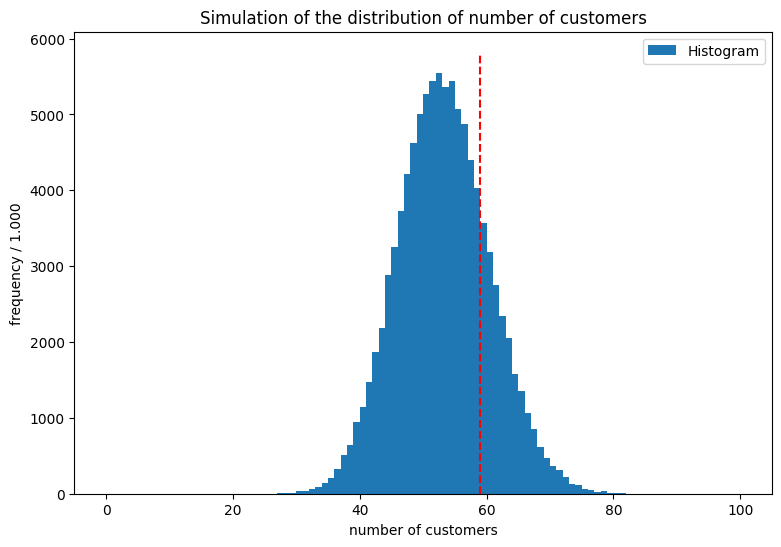

In [6]:
N_points = 100000
simulated_customers = np.random.poisson(l, N_points)
Nbins = 100
xmin = 0
xmax = 100

sorted_customers = np.sort(simulated_customers)[::-1]

top_20_percent_index = int(0.2 * N_points)
top_customers = sorted_customers[:top_20_percent_index+1]
print(f"From simulation, the number of customers that exactly constitutes a busy day is {sorted_customers[top_20_percent_index]}")

fig, ax = plt.subplots(figsize=(9,6));
ax.hist(sorted_customers, bins=Nbins, range=(xmin, xmax), label="Histogram");
ax.plot((sorted_customers[top_20_percent_index], sorted_customers[top_20_percent_index]), (0, 5800), "r--")
ax.set(ylabel=f"frequency / {(xmax-xmin)/Nbins:.3f}", xlabel="number of customers", title="Simulation of the distribution of number of customers")
ax.legend()

In [7]:
print(f"The average number of customers on a busy day is {np.mean(top_customers):.4f} +- {np.std(top_customers, ddof=1)/np.sqrt(len(top_customers)):.4f}")

The average number of customers on a busy day is 63.1332 +- 0.0259


### Problem 2.1

In [8]:
speed = np.array([1532, 1458, 1499, 1394, 1432, 1565, 1474, 1440, 1507])
sig_speed = np.array([67, 55, 74, 129, 84, 19, 10, 17, 14])

mean_weighted = np.sum(speed/sig_speed**2) / np.sum(1/sig_speed**2)
err_weighted = np.sqrt(1 / np.sum(1/sig_speed**2))

print(f"The combined result and uncertainty is ({mean_weighted:.4f} +- {err_weighted:.4f}) m/s.")

chi2 = np.sum((speed - mean_weighted)**2 / sig_speed**2)

Ndof = len(speed) - 1
chi2_prob = stats.chi2.sf(chi2, Ndof)

print(f"chi2 = {chi2}")
print(f"Number of degrees of freedom = {Ndof}")
print(f"The probability to get this result or something worse if the measurements are consistent is p = {chi2_prob:.6f}.")

The combined result and uncertainty is (1487.6611 +- 6.7010) m/s.
chi2 = 29.92173601232985
Number of degrees of freedom = 8
The probability to get this result or something worse if the measurements are consistent is p = 0.000218.


In [9]:
# Only include last 4 measurements

speed_last = speed[5:]
sig_speed_last = sig_speed[5:]

mean_weighted_last = np.sum(speed_last/sig_speed_last**2) / np.sum(1/sig_speed_last**2)
err_weighted_last = np.sqrt(1 / np.sum(1/sig_speed_last**2))

print(f"The combined result and uncertainty for the last 4 measurements is ({mean_weighted_last:.4f} +- {err_weighted_last:.4f}) m/s.")

chi2_last = np.sum((speed_last - mean_weighted_last)**2 / sig_speed_last**2)

Ndof_last = len(speed_last) - 1
chi2_prob_last = stats.chi2.sf(chi2_last, Ndof_last)

print(f"chi2 = {chi2_last}")
print(f"Number of degrees of freedom = {Ndof_last}")
print(f"The probability to get this result or something worse if the measurements are consistent is p = {chi2_prob_last:.6f}.")

The combined result and uncertainty for the last 4 measurements is (1488.1943 +- 6.8467) m/s.
chi2 = 28.197172308884102
Number of degrees of freedom = 3
The probability to get this result or something worse if the measurements are consistent is p = 0.000003.


In [10]:
chi2_each_term = (speed - mean_weighted)**2 / sig_speed**2

print(f"Each measurement contributes to the chi^2 value with: {chi2_each_term}")

Each measurement contributes to the chi^2 value with: [ 0.43794522  0.29083708  0.02347884  0.52715617  0.4390817  16.56870375
  1.86626254  7.86014722  1.90812349]


In [11]:
# remove 6th point

speed_new = np.array([1532, 1458, 1499, 1394, 1432, 1474, 1440, 1507])
sig_speed_new = np.array([67, 55, 74, 129, 84, 10, 17, 14])

mean_weighted_new = np.sum(speed_new/sig_speed_new**2) / np.sum(1/sig_speed_new**2)
err_weighted_new = np.sqrt(1 / np.sum(1/sig_speed_new**2))

print(f"The combined result and uncertainty is ({mean_weighted_new:.4f} +- {err_weighted_new:.4f}) m/s.")

chi2_new = np.sum((speed_new - mean_weighted_new)**2 / sig_speed_new**2)

Ndof_new = len(speed_new) - 1
chi2_prob_new = stats.chi2.sf(chi2_new, Ndof_new)

print(f"chi2 = {chi2_new}")
print(f"Number of degrees of freedom = {Ndof_new}")
print(f"The probability to get this result or something worse if the measurements are consistent is p = {chi2_prob_new:.6f}.")

The combined result and uncertainty is (1476.6747 +- 7.1611) m/s.
chi2 = 10.99935901499825
Number of degrees of freedom = 7
The probability to get this result or something worse if the measurements are consistent is p = 0.138647.


In [12]:
# check if updated estimate is consistent with real value

real_value = 1481

z_statistic = (mean_weighted_new - real_value) / err_weighted_new
p_value = stats.norm.cdf(z_statistic)

print(f"Z-statistic: {z_statistic}")
print(f"P-value: {p_value}")

Z-statistic: -0.6039929345426271
P-value: 0.2729241698124828


In [13]:
# check if original data is consistent with real value

t_statistic, p_value = stats.ttest_1samp(speed, real_value, alternative="less")

print(f"t-statistic: {t_statistic}")
print(f"P-value: {p_value}")

t-statistic: -0.1748336116254069
P-value: 0.43277706494789103


### Problem 2.2

In [14]:
def print_relation(R, name):
    """Function for printing relation"""
    lprint(latex(Eq(symbols(name),R)))

def propagate_error(F, PAR, COV):
    """Function for propagating errors"""

    variance_total = 0
    each_contrib = []

    for i in range(len(PAR)):
        for j in range(len(PAR)):
            variance = F.diff(PAR[i]) * F.diff(PAR[j]) * COV[i, j]
            variance_total += F.diff(PAR[i]) * F.diff(PAR[j]) * COV[i, j]
            each_contrib.append(variance)

    return sqrt(variance_total), each_contrib

In [15]:
A, gamma, omega = symbols("A, gamma, omega")
dA, dgamma, domega = symbols("sigma_A, sigma_gamma, sigma_omega")

x = A * exp(-gamma) * cos(omega)

par = np.array([A, gamma, omega])
cov = np.array([[dA**2, 0, 0], [0, dgamma**2, 0], [0, 0, domega**2]])

print_relation(x, "x")
dx, _ = propagate_error(x, par, cov)
print_relation(dx, "sigma_x")

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [16]:
v_A, v_dA = 1.01, 0.19
v_gamma, v_dgamma = 0.12, 0.05
v_omega, v_domega = 0.47, 0.06

f_x = lambdify((A, gamma, omega), x)
f_dx = lambdify((A, gamma, omega, dA, dgamma, domega), dx)

print(f"x = {f_x(v_A, v_gamma, v_omega):.4f} +- {f_dx(v_A, v_gamma, v_omega, v_dA, v_dgamma, v_domega):.4f}")

x = 0.7987 +- 0.1574


In [17]:
# Simulation for cross check

N_exp = 10000

cov = np.array([[v_dA**2, 0, 0], [0, v_dgamma**2, 0], [0, 0, v_domega**2]])

x12_all = np.random.multivariate_normal([v_A, v_gamma, v_omega], cov, size=N_exp)

y_all = x12_all[:,0] * np.exp(-x12_all[:,1]) * np.cos(x12_all[:,2])

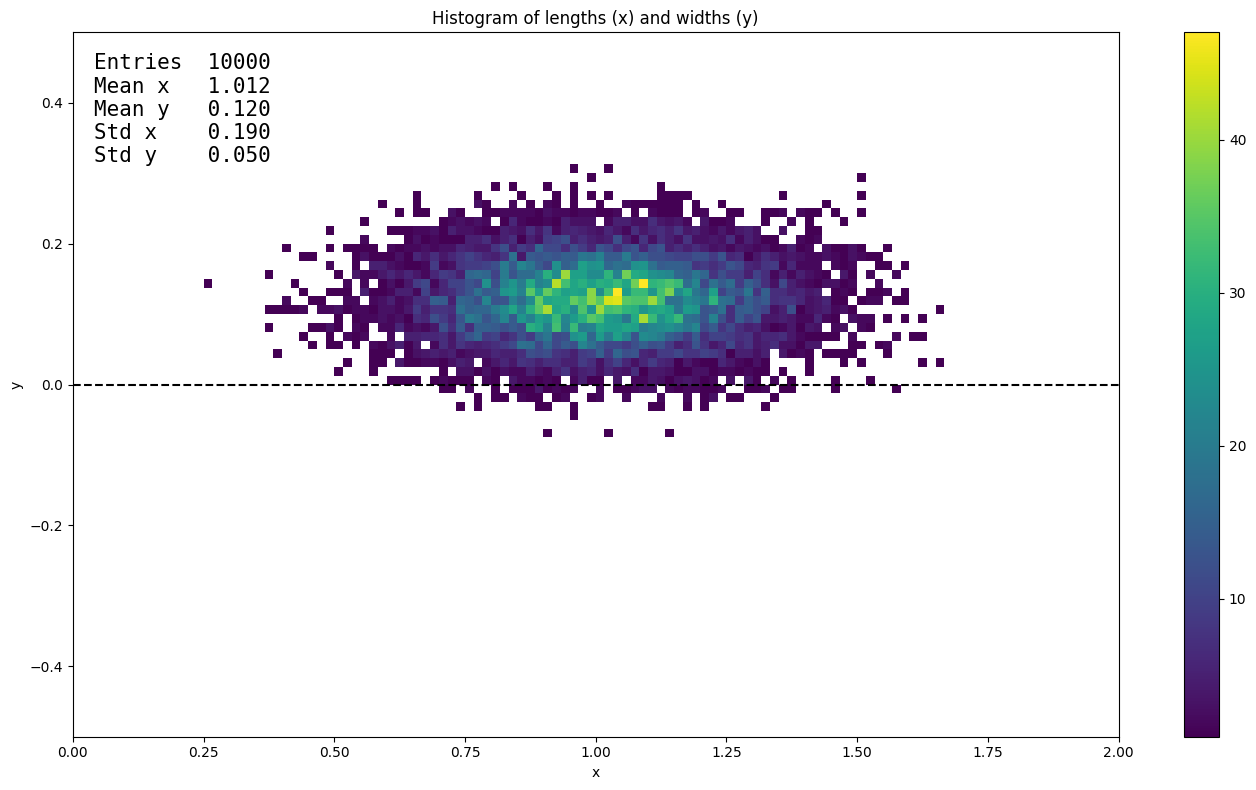

In [18]:
fig, ax = plt.subplots(figsize=(14, 8))
counts, xedges, yedges, im = ax.hist2d(x12_all[:,0], x12_all[:,1], bins=[120, 80], range=[[0, 2], [-0.5, 0.5]], cmin=1)
ax.plot([0.0, 6.0], [0.0, 0.0], "--k")
fig.colorbar(im)

ax.set(title='Histogram of lengths (x) and widths (y)',
       xlabel='x', 
       ylabel='y'
      )

d = {'Entries': len(x12_all),
     'Mean x': x12_all[:,0].mean(),
     'Mean y': x12_all[:,1].mean(),
     'Std x': x12_all[:,0].std(ddof=1),
     'Std y': x12_all[:,1].std(ddof=1),
    }

text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.97, text, ax, fontsize=15);

fig.tight_layout()

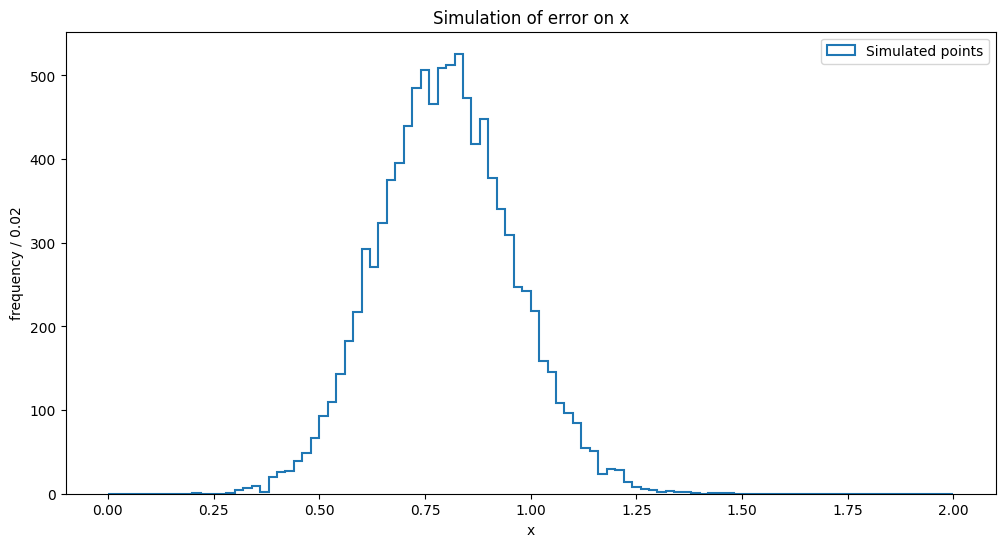

In [19]:
nbins = 100
xmin, xmax = 0.0, 2.0
binwidth = (xmax-xmin)/nbins

fig2, ax2 = plt.subplots(figsize=(12, 6));
ax2.set(title="Simulation of error on x", xlabel="x", ylabel=f"frequency / {binwidth}")
counts, bin_edges, _ = ax2.hist(y_all, nbins, range=(xmin, xmax), histtype='step', linewidth=1.5, label="Simulated points")
bin_centers = (bin_edges[1:] + bin_edges[:-1])/2
s_counts = np.sqrt(counts)
ax2.legend()

In [20]:
mean = y_all.mean()
std = y_all.std(ddof=1)
print(f"  Mean = {mean:.4f} +- {std/np.sqrt(N_exp):.4f},    Std = {std:.4f}")

  Mean = 0.7996 +- 0.0016,    Std = 0.1576


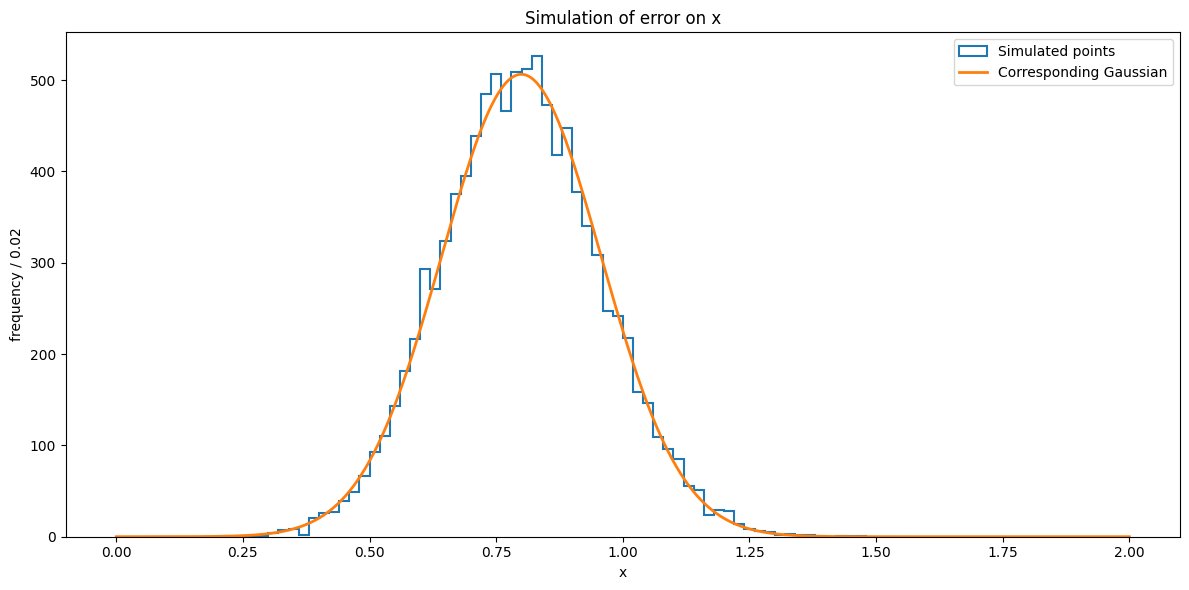

In [21]:
def gaussian(x, N, mu, sigma):
    return N * binwidth / (sigma*np.sqrt(2*np.pi)) * np.exp(-0.5* (x-mu)**2/sigma**2)

xaxis = np.linspace(xmin, xmax, 1000)
yaxis = gaussian(xaxis, N_exp, mean, std)
ax2.plot(xaxis, yaxis, linewidth=2, label="Corresponding Gaussian")
ax2.legend()
fig2.tight_layout()
fig2

In [22]:
# creating it as a function of t

t = symbols("t")

x = A * exp(-gamma*t) * cos(omega*t)

_, each_contrib = propagate_error(x, par, cov)
print(each_contrib)
error_A = each_contrib[0]
error_gamma = each_contrib[4]
error_omega = each_contrib[8]

print_relation(error_A, "A")
print_relation(error_gamma, "gamma")
print_relation(error_omega, "omega")

[0.0361*exp(-2*gamma*t)*cos(omega*t)**2, 0, 0, 0, 0.0025*A**2*t**2*exp(-2*gamma*t)*cos(omega*t)**2, 0, 0, 0, 0.0036*A**2*t**2*exp(-2*gamma*t)*sin(omega*t)**2]


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [23]:
f_error_A = lambdify((t, A, gamma, omega, dA), error_A)
f_error_gamma = lambdify((t, A, gamma, omega, dgamma), error_gamma)
f_error_omega = lambdify((t, A, gamma, omega, domega), error_omega)

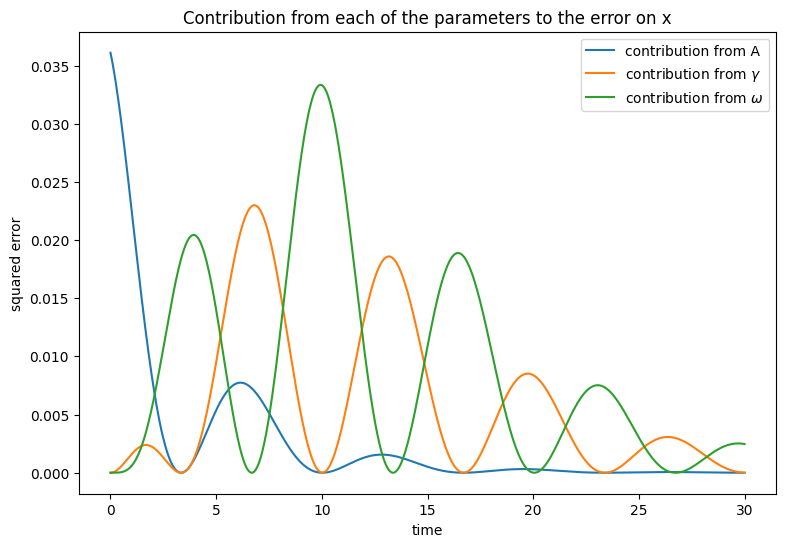

In [24]:
fig, ax = plt.subplots(figsize=(9,6))

A_axis = np.ones(1000) * v_A
gamma_axis = np.ones(1000) * v_gamma
omega_axis = np.ones(1000) * v_omega
dA_axis = np.ones(1000) * v_dA
dgamma_axis = np.ones(1000) * v_dgamma
domega_axis = np.ones(1000) * v_domega

t_axis = np.linspace(0, 30, 1000)
v_error_A = f_error_A(t_axis, A_axis, gamma_axis, omega_axis, dA_axis)
v_error_gamma = f_error_gamma(t_axis, A_axis, gamma_axis, omega_axis, dgamma_axis)
v_error_omega = f_error_omega(t_axis, A_axis, gamma_axis, omega_axis, domega_axis)

ax.plot(t_axis, v_error_A, label="contribution from A")
ax.plot(t_axis, v_error_gamma, label=r"contribution from $\gamma$")
ax.plot(t_axis, v_error_omega, label=r"contribution from $\omega$")
ax.set(title="Contribution from each of the parameters to the error on x", xlabel="time", ylabel="squared error")
ax.legend()

### Problem 3.1

In [25]:
def p_score(x):
    if np.abs(x) < 4:
        return np.abs(x) / 4
    else:
        return 0

In [26]:
aim = 2.5
sig_aim = 1

N_try = 10000
N_score = 0

for i in range(N_try):

    x_hit = np.random.normal(loc=aim, scale=sig_aim)

    if np.random.uniform() <= p_score(x_hit):
        N_score += 1

f = N_score / N_try
e_f = np.sqrt(f*(1-f)/N_try)

print(f"The fraction of successful scores is {f} +- {e_f}")

The fraction of successful scores is 0.5537 +- 0.004971079460237987


In [27]:
def score_prob(x_aim):
    aim = np.copy(x_aim)

    N_try = 10000
    N_score = 0

    for i in range(N_try):

        x_hit = np.random.normal(loc=aim, scale=sig_aim)

        if np.random.uniform() <= p_score(x_hit):
            N_score += 1

    f = N_score / N_try
    e_f = np.sqrt(f*(1-f)/N_try)

    return f, e_f

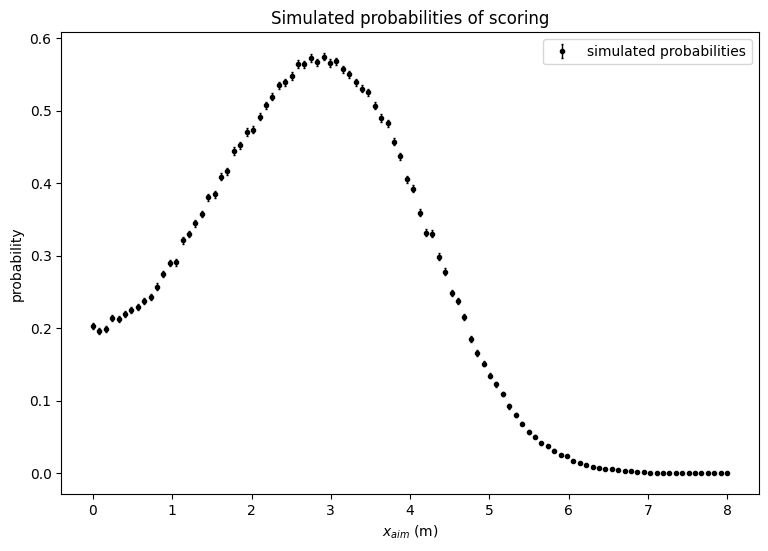

In [28]:
score_prob_vec = np.vectorize(score_prob)

x_aim_array = np.linspace(0, 8, 100)
prob_array, sig_prob_array = score_prob_vec(x_aim_array)

fig, ax = plt.subplots(figsize=(9,6))
ax.errorbar(x_aim_array, prob_array, yerr=sig_prob_array, label="simulated probabilities", fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)
ax.set(title="Simulated probabilities of scoring", xlabel=r"$x_{aim}$ (m)", ylabel="probability")
plt.legend()

In [29]:
def poly(x, a, b, c):
    return a*x**2 + b*x + c

Fit value: a = -0.13324 +/- 0.00328
Fit value: b = 0.76491 +/- 0.01968
Fit value: c = -0.52779 +/- 0.02870
Chi2 value: 12.9   Ndof = 22    Prob(Chi2,Ndof) = 0.9352958354719973


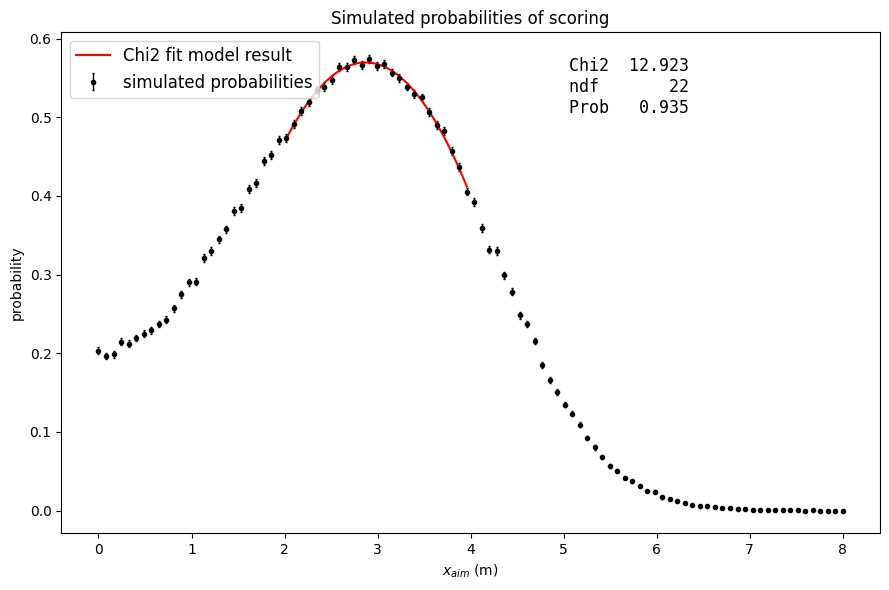

In [30]:
Minuit.print_level = 1

chi2fit = Chi2Regression(poly, x_aim_array[25:50], prob_array[25:50], sig_prob_array[25:50])

minuit_chi2 = Minuit(chi2fit, a=0.0, b=0.0, c=0.0)
minuit_chi2.errordef = 1.0     # This is the definition for ChiSqaure fits
minuit_chi2.migrad()           # This is where the minimisation is carried out! Put ";" at the end to void output


for name in minuit_chi2.parameters :
    value, error = minuit_chi2.values[name], minuit_chi2.errors[name]
    print(f"Fit value: {name} = {value:.5f} +/- {error:.5f}")

# Get Chi2 value:
chi2_value = minuit_chi2.fval            # The value minimised, i.e. Chi2 or -2*LogLikeliHood (LLH) value

# Get number of degrees-of-freedom (Ndof):
Ndof_value = len(prob_array[25:50]) - minuit_chi2.nfit

Prob_value = stats.chi2.sf(chi2_value, Ndof_value) # The chi2 probability given N_DOF degrees of freedom
print(f"Chi2 value: {chi2_value:.1f}   Ndof = {Ndof_value:.0f}    Prob(Chi2,Ndof) = {Prob_value}")

fig, ax = plt.subplots(figsize=(9, 6))  # figsize is in inches
ax.errorbar(x_aim_array, prob_array, yerr=sig_prob_array, label='simulated probabilities', fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)

# Set the figure texts; xlabel, ylabel and title.
ax.set(title="Simulated probabilities of scoring", xlabel=r"$x_{aim}$ (m)", ylabel="probability")

# Adding fit function to plot:
x_axis = np.linspace(0, 8, 1000)
ax.plot(x_aim_array[25:50], poly(x_aim_array[25:50], *minuit_chi2.values[:]), '-r', label='Chi2 fit model result') 

# Adding fit results to plot:
d = {'Chi2':     minuit_chi2.fval  ,
    'ndf':      len(prob_array[25:50])-minuit_chi2.nfit,
    'Prob':     stats.chi2.sf(minuit_chi2.fval, len(prob_array[25:50])-minuit_chi2.nfit),
    }

text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.62, 0.95, text, ax, fontsize=12)

ax.legend(loc='upper left', fontsize=12);
fig.tight_layout()

In [31]:
a, b, c = symbols("a, b, c")
da, db, dc = symbols("sigma_a, sigma_b, sigma_c")

x_max = - b / (2 * a)

par = np.array([a, b, c])
cov = np.array([[da**2, 0, 0], [0, db**2, 0], [0, 0, dc**2]])

print_relation(x_max, "x_max")
dx_max, _ = propagate_error(x_max, par, cov)
print_relation(dx_max, "sigma_x")

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [32]:
v_a, v_da = -0.13088, 0.00328
v_b, v_db = 0.75094, 0.01970
v_c, v_dc = -0.50732, 0.02871

f_x_max = lambdify((a, b, c), x_max)
f_dx_max = lambdify((a, b, c, da, db, dc), dx_max)

print(f"x = {f_x_max(v_a, v_b, v_c):.4f} +- {f_dx_max(v_a, v_b, v_c, v_da, v_db, v_dc):.4f}")

x = 2.8688 +- 0.1041


### Problem 3.2

In [33]:
def f(x, C=1/(3*np.pi)):
    return C * (np.arctan(x) + np.pi/2)

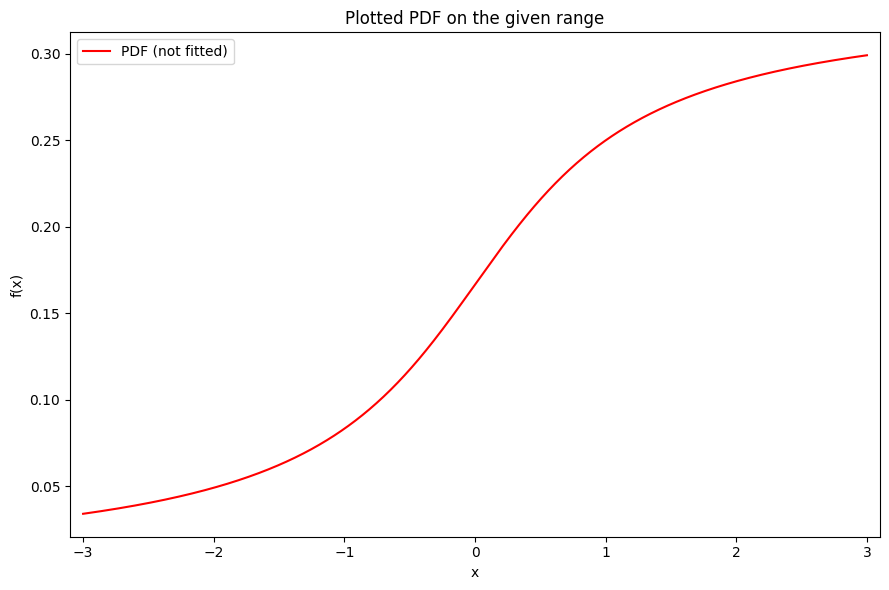

In [34]:
# I start by plotting the function
xmin = -3
xmax = 3

fig, ax = plt.subplots(figsize=(9, 6))
ax.set(xlabel="x", ylabel="f(x)", xlim=(xmin-0.1, xmax+0.1), title="Plotted PDF on the given range");

# Plot f(x)
x_axis = np.linspace(xmin, xmax, 1000)
y_axis = f(x_axis)
ax.plot(x_axis, y_axis, 'r-', label='PDF (not fitted)')

# Add legend
ax.legend(loc='best')
fig.tight_layout()

In [35]:
# accept-reject

N_points = 100

N_try = 0
ymin = 0.0
ymax = f(xmax)      
x_pdf = np.zeros(N_points)

for i in range(N_points):
    
    while True:
        
        # Count the number of tries, to get efficiency/integral
        N_try += 1                    
        
        # Range that f(x) is defined/wanted in:
        x_test = np.random.uniform(xmin, xmax)  
        
        # Upper bound for function values:
        y_test = np.random.uniform(ymin, ymax)
        
        if (y_test < f(x_test)):
            break
            
    x_pdf[i] = x_test

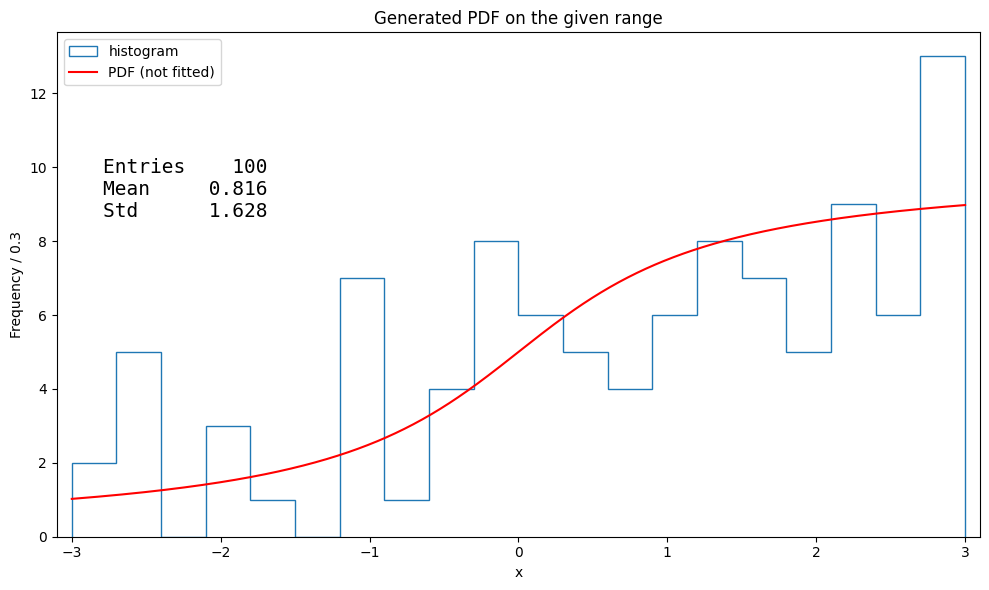

In [36]:
Nbins = 20
binwidth = (xmax - xmin) / Nbins

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(x_pdf, bins=Nbins, range=(xmin, xmax), histtype='step', label='histogram' )
ax.set(xlabel="x", ylabel=f"Frequency / {binwidth}", xlim=(xmin-0.1, xmax+0.1), title="Generated PDF on the given range");

ax.plot(x_axis, y_axis*binwidth*N_points, 'r-', label='PDF (not fitted)')

# Define figure text
d2 = {'Entries': len(x_pdf),
     'Mean': x_pdf.mean(),
     'Std': x_pdf.std(ddof=1),
    }

# Plot figure text
text = nice_string_output(d2, extra_spacing=2, decimals=3)
add_text_to_ax(0.05, 0.75, text, ax, fontsize=14)

# Add legend
ax.legend(loc='best')
fig.tight_layout()

In [37]:
def fit_pdf_llhfit(x, C):
    return N_points * f(x, C=C)

ullhfit = UnbinnedLH(fit_pdf_llhfit, x_pdf, bound=(xmin, xmax), extended=True)
minuit_ullh = Minuit(ullhfit, C=1/(3*np.pi))
minuit_ullh.errordef = 0.5     # Value for likelihood fits
minuit_ullh.migrad()           # Perform the actual fit

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -191.6                     │              Nfcn = 13               │
│ EDM = 2.14e-07 (Goal: 0.0001)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ C    │   0.107   │   0.011   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────┐
│   │        C │
├───┼──────────┤
│ C │ 0.000114 │
└───┴──────────┘

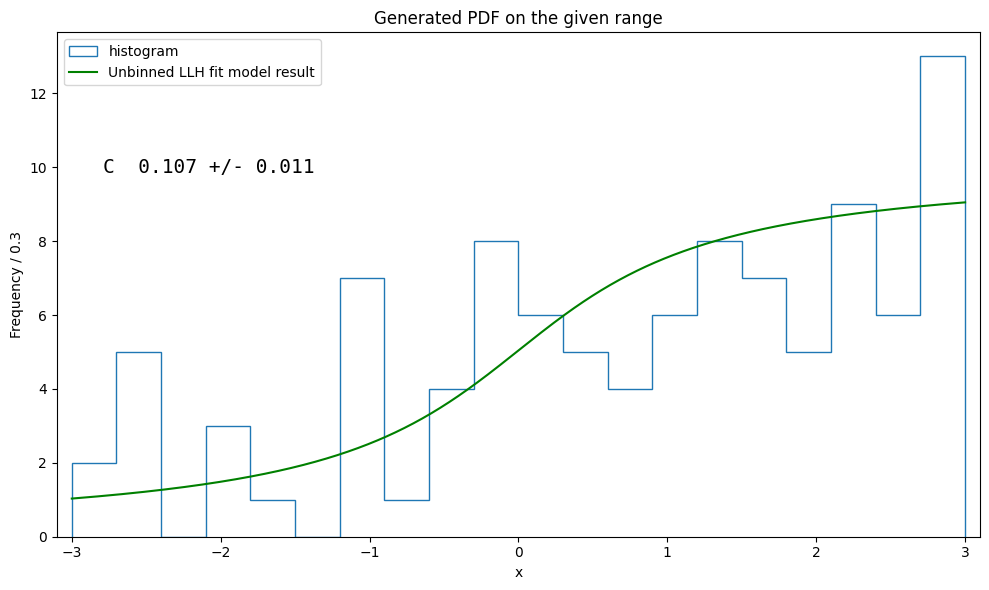

In [38]:

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(x_pdf, bins=Nbins, range=(xmin, xmax), histtype='step', label='histogram' )
ax.set(xlabel="x", ylabel=f"Frequency / {binwidth}", xlim=(xmin-0.1, xmax+0.1), title="Generated PDF on the given range");

ax.plot(x_axis, N_points*binwidth*f(x_axis, *minuit_ullh.values[:]), '-g', label='Unbinned LLH fit model result')

# Define figure text
d = {'C':   [minuit_ullh.values['C'], minuit_ullh.errors['C']],
    }

# Plot figure text
text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.05, 0.75, text, ax, fontsize=14)

# Add legend
ax.legend(loc='best')
fig.tight_layout()

### Problem 4.1

In [39]:
dataframe = pd.read_csv('data_LargestPopulation.csv', header=0)
Year, PopIndia, PopChina = dataframe.values.T

year = Year - np.min(Year)  # convert Year to years after 1960

[1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973]
Fit value: a = 11745302.45454 +/- 0.09535
Fit value: b = 441062982.18187 +/- 0.82020
Chi2 value: 17771510841701.0   Ndof = 9    Prob(Chi2,Ndof) = 0.0


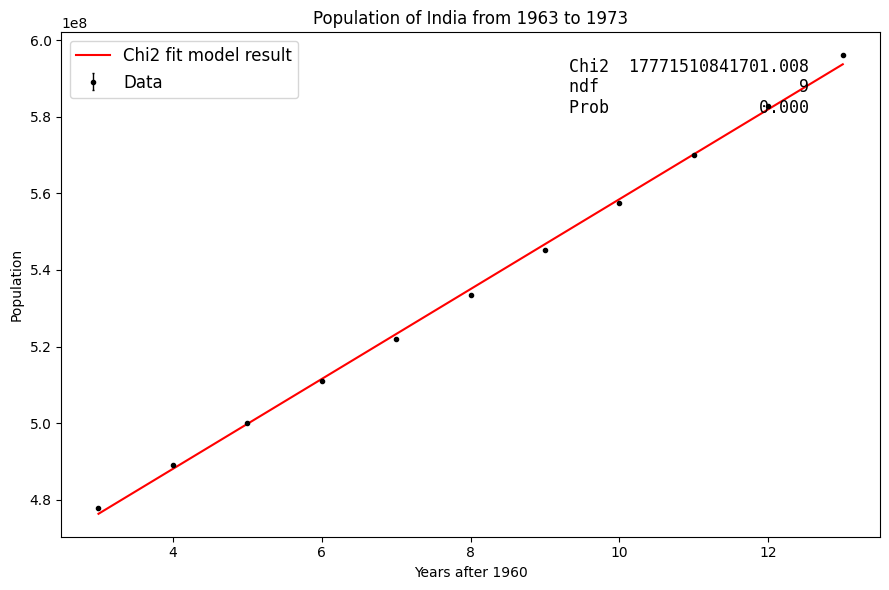

In [40]:
print(Year[3:14])
year_subset = year[3:14]
PopIndia_subset = PopIndia[3:14]

def linear(x, a, b):
    return a*x+b

par, err = fit_and_plot(linear, year_subset, PopIndia_subset, 1, {"a":0.0, "b":0.0}, ["Years after 1960", "Population", "Population of India from 1963 to 1973"])

In [41]:
res = PopIndia_subset - linear(year_subset, *par)
print(f"residuals: {res} \n")

sigma_PopIndia = np.std(res, ddof=1)
print(f"The uncertainty on a data-point is {sigma_PopIndia:.2f}.")

residuals: [ 1634740.45451063  1015107.99997216   324845.5454337   -542196.90910476
 -1293029.36364323 -1593501.81818169 -1456004.2727201  -1014706.72725868
  -262139.18179703   831338.36366439  2355545.90912604] 

The uncertainty on a data-point is 1333098.30.


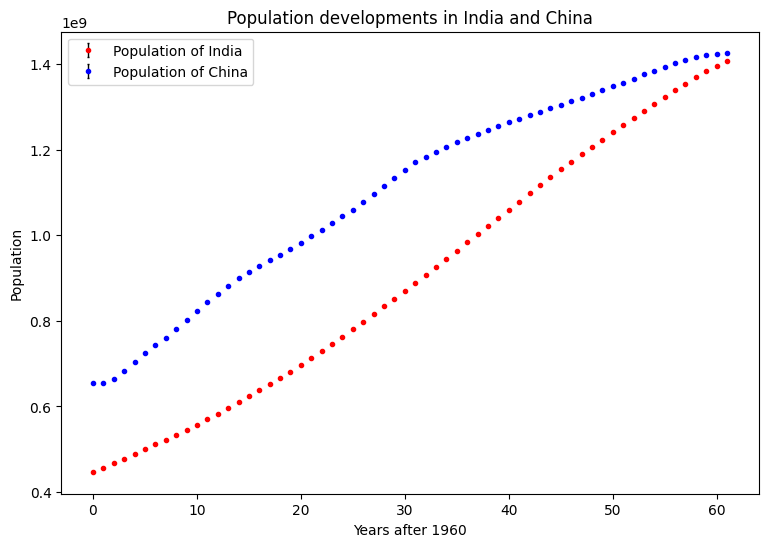

In [42]:
fig, ax = plt.subplots(figsize=(9,6))
ax.errorbar(year, PopIndia, yerr=1*1e6, label='Population of India', fmt='.r',  ecolor='k', elinewidth=1, capsize=1, capthick=1)
ax.errorbar(year, PopChina, yerr=1*1e6, label='Population of China', fmt='.b',  ecolor='k', elinewidth=1, capsize=1, capthick=1)
ax.set(title="Population developments in India and China", xlabel="Years after 1960", ylabel="Population")
ax.legend()


Fit value: k = 0.05045 +/- 0.00026
Fit value: x0 = 36.94688 +/- 0.07187
Fit value: a = 1507723238.92794 +/- 6623236.30853
Fit value: b = 247848700.55265 +/- 2521530.59101
Chi2 value: 87.8   Ndof = 58    Prob(Chi2,Ndof) = 0.0069302970223768644


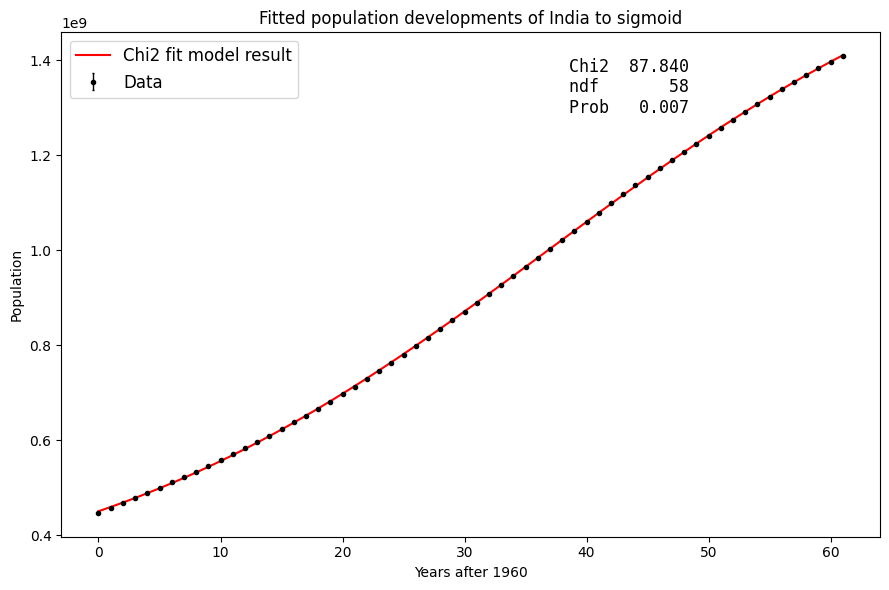

In [43]:
def logistic(x, k, x0, a, b):
    return a / (1 + np.exp(-k*(x-x0))) + b

_ = fit_and_plot(logistic, year, PopIndia, 1*1e6, {"k":0.1, "x0":30, "a":1e9, "b":5e8}, ["Years after 1960", "Population", "Fitted population developments of India to sigmoid"])

E VariableMetricBuilder Initial matrix not pos.def.
Fit value: x0 = 26.43542 +/- 0.02536
Fit value: a = 699999631.71742 +/- 1.45794
Fit value: b = 0.09007 +/- 0.00005
Fit value: c = -28.32215 +/- 1.41447
Chi2 value: 10662.7   Ndof = 58    Prob(Chi2,Ndof) = 0.0


/var/folders/bh/qd5vvgrj3dxbcwf3jbzbldrm0000gn/T/ipykernel_9916/1907844292.py:2: RuntimeWarning: invalid value encountered in log
  return a * np.log(b*(x+x0)) + c


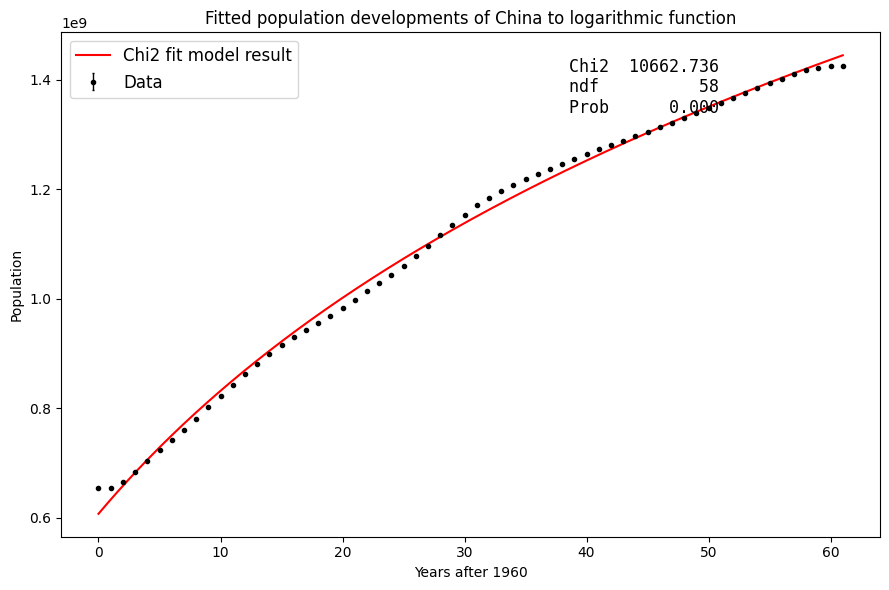

In [44]:
def log_func(x, x0, a, b, c):
    return a * np.log(b*(x+x0)) + c

_ = fit_and_plot(log_func, year, PopChina, 1*1e6, {"x0":30, "a":7e8, "b":114, "c":-5e-9}, ["Years after 1960", "Population", "Fitted population developments of China to logarithmic function"])

Fit value: k = 0.04433 +/- 0.00037
Fit value: x0 = 5.23620 +/- 0.37903
Fit value: a = 1643424788.22433 +/- 17979278.43407
Fit value: b = -89411991.25229 +/- 15895160.46491
Chi2 value: 3654.8   Ndof = 58    Prob(Chi2,Ndof) = 0.0


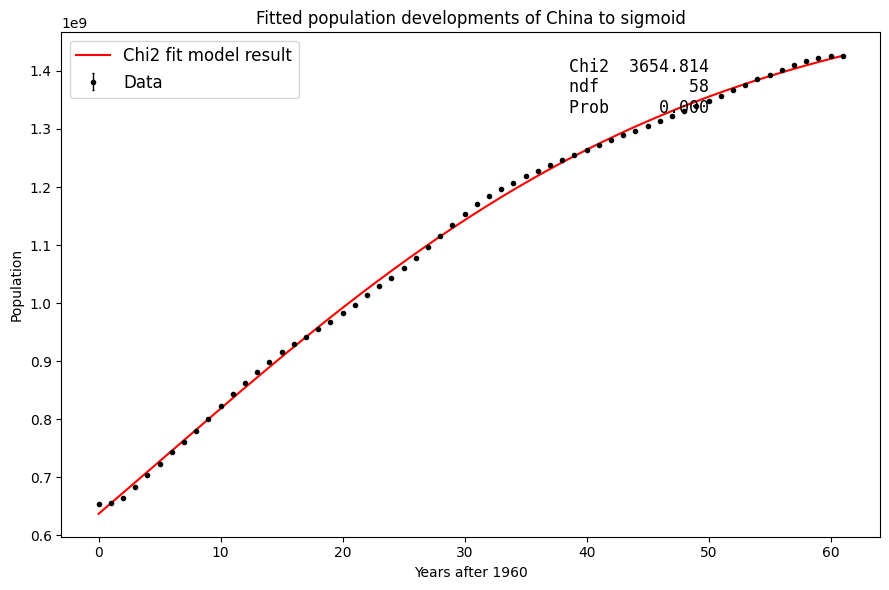

In [45]:
def logistic(x, k, x0, a, b):
    return a / (1 + np.exp(-k*(x-x0))) + b

_ = fit_and_plot(logistic, year, PopChina, 1*1e6, {"k":0.04, "x0":5, "a":1e9, "b":0}, ["Years after 1960", "Population", "Fitted population developments of China to sigmoid"])

Fit value: a = 13412019.99771 +/- 316227.81114
Fit value: b = 590743240.13489 +/- 18662799.88298
Chi2 value: 4.9   Ndof = 3    Prob(Chi2,Ndof) = 0.17963689288421592


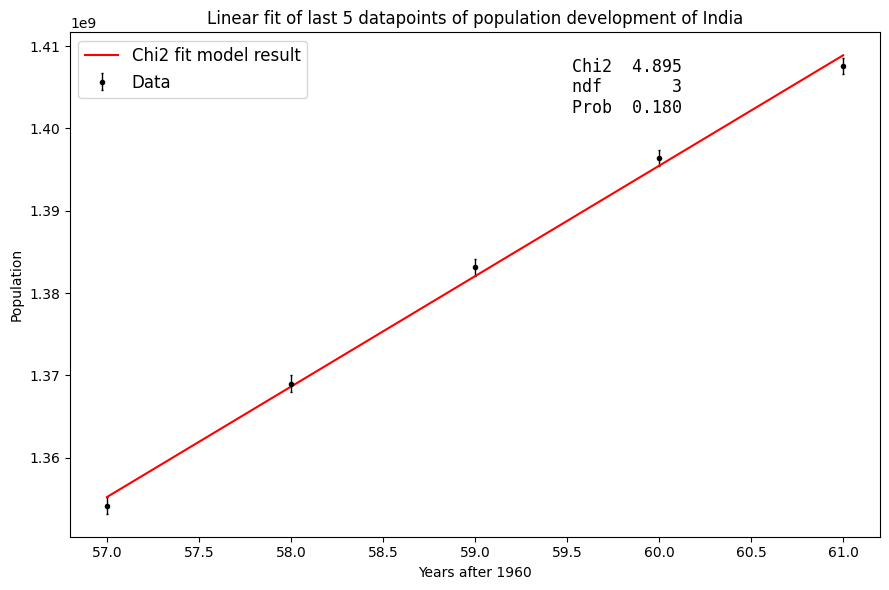

In [46]:
def linear(x, a, b):
    return a*x+b

_ = fit_and_plot(linear, year[-5:], PopIndia[-5:], 1*1e6, {"a":0.0, "b":0.0}, ["Years after 1960", "Population", "Linear fit of last 5 datapoints of population development of India"])

Fit value: a = 3906863.41919 +/- 316227.76609
Fit value: b = 1189501757.12505 +/- 18662797.22245
Chi2 value: 12.8   Ndof = 3    Prob(Chi2,Ndof) = 0.005064720713022652


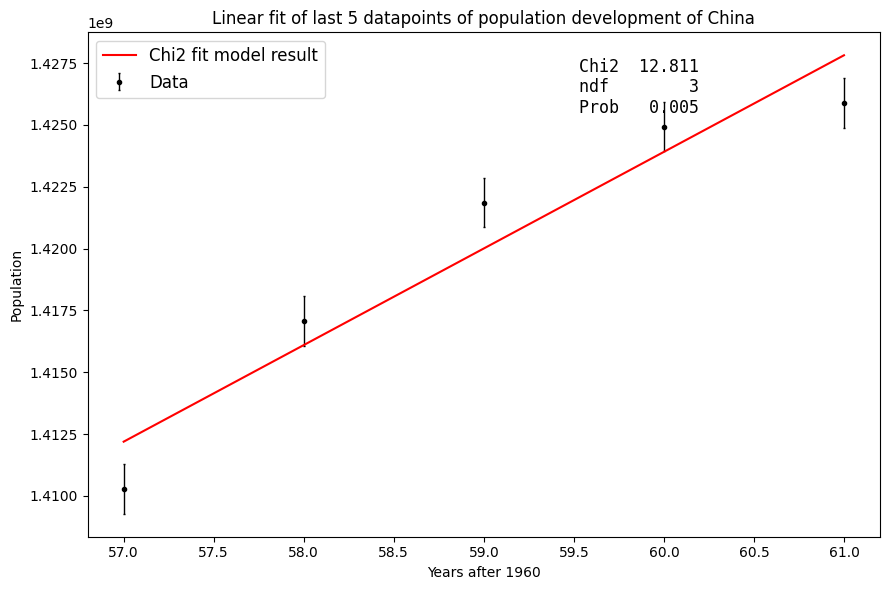

In [47]:

_ = fit_and_plot(linear, year[-5:], PopChina[-5:], 1*1e6, {"a":0.0, "b":0.0}, ["Years after 1960", "Population", "Linear fit of last 5 datapoints of population development of China"])

In [48]:
a_i, a_c, b_i, b_c = symbols("a_I, a_C, b_I, b_C")
da_i, da_c, db_i, db_c = symbols("sigma_a_I, sigma_a_C, sigma_b_I, sigma_b_C")

x = (b_c - b_i) / (a_i - a_c)

par = np.array([a_i, a_c, b_i, b_c])
cov = np.array([[da_i**2, 0, 0, 0], [0, da_c**2, 0, 0], [0, 0, db_i**2, 0], [0 ,0, 0, db_c**2]])

print_relation(x, "x")
dx, _ = propagate_error(x, par, cov)
print_relation(dx, "sigma_x")

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [49]:
v_a_i, v_da_i = 13412019.99771, 316227.81114
v_a_c, v_da_c = 3906863.41919, 316227.76609
v_b_i, v_db_i = 590743240.13489, 18662799.88298
v_b_c, v_db_c = 1189501757.12505, 18662797.22245

f_x = lambdify((a_i, a_c, b_i, b_c), x)
f_dx = lambdify((a_i, a_c, b_i, b_c, da_i, da_c, db_i, db_c), dx)

print(f"Number of years after 1960 that the Indian population overtakes the Chinese: {f_x(v_a_i, v_a_c, v_b_i, v_b_c):.4f} +- {f_dx(v_a_i, v_a_c, v_b_i, v_b_c, v_da_i, v_da_c, v_db_i, v_db_c):.4f}")

Number of years after 1960 that the Indian population overtakes the Chinese: 62.9930 +- 4.0613


### Problem 4.2

In [50]:
# performing Fisher's exact test

table = np.array([[10, 14], [4, 20]])

p = stats.fisher_exact(table, alternative="greater")[1]
print(f"For Fisher's exact test, p-value = {p}")

For Fisher's exact test, p-value = 0.055358855071627064


### Problem 4.3

In [51]:
A = np.array([28.9, 26.4, 22.8, 27.3, 25.9])
B = np.array([22.4, 21.3, 25.1, 24.8, 22.5])

mean_A = np.mean(A)
sig_A = np.std(A, ddof=1)

mean_B = np.mean(B)
sig_B = np.std(B, ddof=1)

z = (mean_A - mean_B) / np.sqrt(sig_A**2 + sig_B**2)
print(f"z = {z}")

p_value = stats.norm.sf(z)
print(f"p = {p_value}")

z = 1.0905939250679448
p = 0.13772580192159234


### Problem 5.1

In [52]:
dataframe = pd.read_csv('data_SignalDetection.csv', header=0)
index, P, R, freq, type = dataframe.values.T
dataframe

,Index,Phase,Resonance,Frequency,Type
0,1.0,6.41748,1.35986,2.29355,0.0
1,2.0,2.83297,2.88136,0.95732,0.0
2,3.0,5.13004,11.45223,1.41931,1.0
3,4.0,9.60038,10.35148,0.68279,0.0
4,5.0,7.17903,4.45108,2.74433,0.0
...,...,...,...,...,...
119995,119996.0,4.25885,-0.08775,5.96166,-1.0
119996,119997.0,6.45887,4.62049,3.77644,-1.0
119997,119998.0,0.53238,-2.07295,0.40504,-1.0
119998,119999.0,1.94328,8.69095,0.00043,-1.0


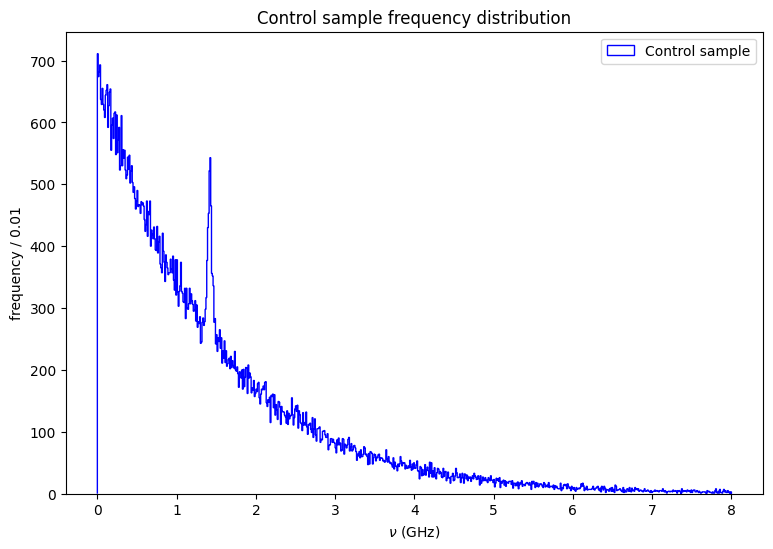

In [53]:
Nbins = 800
xmin = 0
xmax = 8
binwidth = (xmax - xmin) / Nbins

fig, ax = plt.subplots(figsize=(9,6))
ax.hist(freq[type!=-1], bins=Nbins, label="Control sample", histtype='step', color='Blue', lw=1.0, range=(xmin,xmax));
ax.set(title="Control sample frequency distribution", xlabel=r"$\nu$ (GHz)", ylabel=f"frequency / {binwidth}")
plt.legend()

Fit value: sigma = 0.02715 +/- 0.00144
Fit value: tau = 1.40246 +/- 0.00466
Fit value: N = 991.65649 +/- 3.15194
Fit value: f = 0.01741 +/- 0.00077
Chi2 value: 834.2   Ndof = 793    Prob(Chi2,Ndof) = 0.1505472562453348


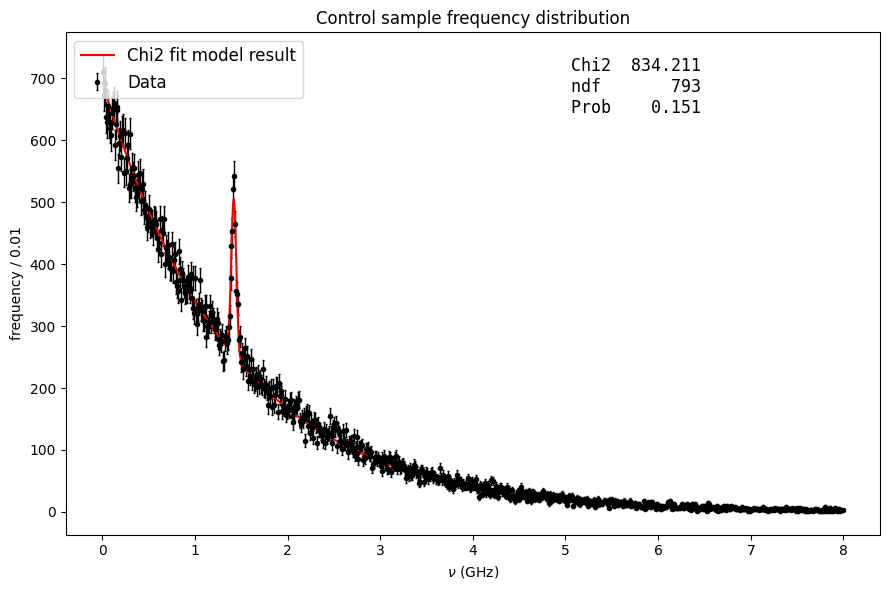

In [54]:
def gauss_and_exp_pdf(x, sigma, tau, N, f) :
    """Gaussian and exponential"""
    mu = 1.42
    return  N * (f / np.sqrt(2*np.pi) / sigma * np.exp( -0.5 * (x-mu)**2 / sigma**2) + (1-f) / tau * np.exp(-x/tau))

# Find the x, y and error on y (sy) given the histogram:
counts, bin_edges = np.histogram(freq[type!=-1], bins=Nbins, range=(xmin, xmax))
x = (bin_edges[1:][counts>0] + bin_edges[:-1][counts>0])/2
y = counts[counts>0]
sy = np.sqrt(counts[counts>0])   # NOTE: We (naturally) assume that the bin count is Poisson distributed.

_ = fit_and_plot(gauss_and_exp_pdf, x, y, sy, {"sigma":0.1, "tau":100, "N":1000, "f":0.01}, [r"$\nu$ (GHz)", f"frequency / {binwidth}", "Control sample frequency distribution"])

In [55]:
def calc_separation(x, y):
    
    d = np.abs(x.mean() - y.mean()) / np.sqrt(x.std(ddof=1)**2 + y.std(ddof=1)**2)
    
    return d

def get_covariance_offdiag(X, Y):
    return np.cov(X, Y, ddof=1)[0, 1]

Text(0, 0.5, 'Frequency')

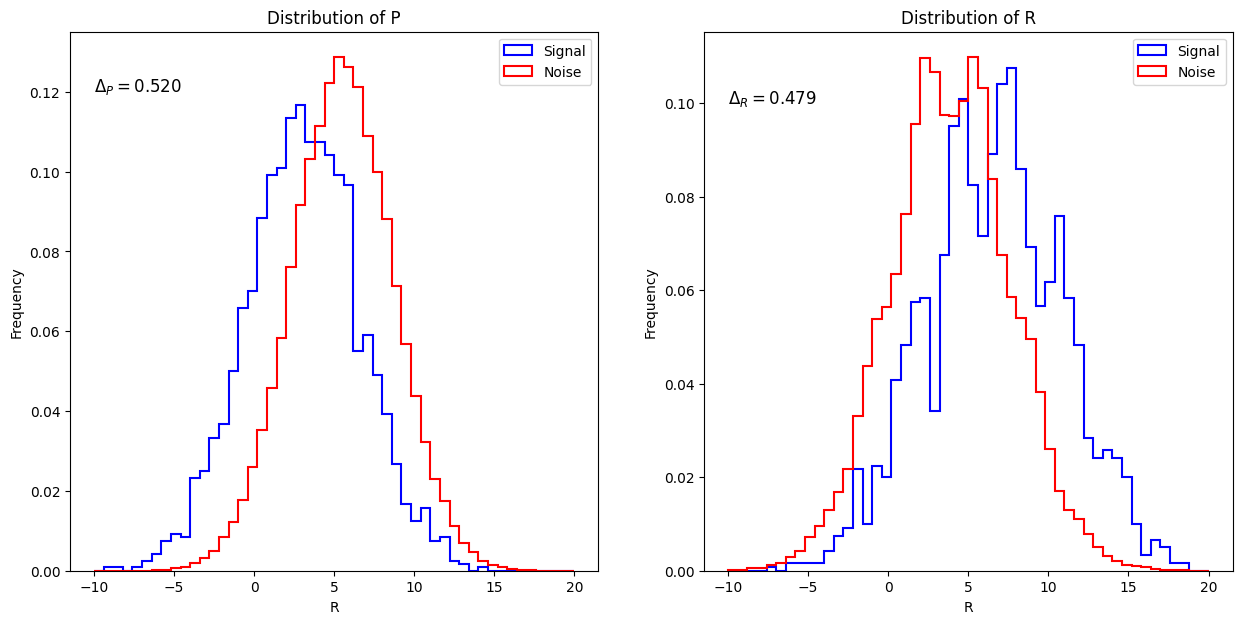

In [56]:
Nbins = 50
xmin = -10
xmax = 20
binwidth = (xmax - xmin) / Nbins

fig, ax = plt.subplots(ncols=2, figsize=(15,7))

ax[0].hist(P[type==1], bins=Nbins, label="Signal", histtype='step', color='Blue', lw=1.5, range=(xmin,xmax), density=True);
ax[1].hist(R[type==1], bins=Nbins, label="Signal", histtype='step', color='Blue', lw=1.5, range=(xmin,xmax), density=True);
ax[0].hist(P[type==0], bins=Nbins, label="Noise", histtype='step', color='Red', lw=1.5, range=(xmin,xmax), density=True);
ax[1].hist(R[type==0], bins=Nbins, label="Noise", histtype='step', color='Red', lw=1.5, range=(xmin,xmax), density=True);

ax[0].legend()
ax[0].set_title("Distribution of P")
ax[0].text(-10, 0.12, fr'$\Delta_{{P}} = {calc_separation(P[type==1.0], P[type==0.0]):.3f}$', fontsize=12)
ax[0].set_xlabel("R")
ax[0].set_ylabel(f"Frequency")

ax[1].legend()
ax[1].set_title("Distribution of R")
ax[1].text(-10, 0.1, fr'$\Delta_{{R}} = {calc_separation(R[type==1], R[type==0]):.3f}$', fontsize=12)
ax[1].set_xlabel("R")
ax[1].set_ylabel(f"Frequency")

In [57]:
data_signal = np.array([P[type==1], R[type==1]])
data_noise = np.array([P[type==0], R[type==0]])

covmat_signal = np.cov(data_signal, ddof=1)
covmat_noise = np.cov(data_noise, ddof=1)

# The calculations requires the inverted COMBINED covariance matrices:
print("Combined covariance matrix:")
covmat_comb = covmat_signal + covmat_noise
print(covmat_comb)
print("")

print("Inverted combined covariance matrix:")
covmat_comb_inv = np.linalg.inv(covmat_comb)
print(covmat_comb_inv)
print("")

wf = covmat_comb_inv @ (data_signal.mean(axis=1) - data_noise.mean(axis=1))
print(f"w_f = {wf}")

Combined covariance matrix:
[[22.13768957 20.36224203]
 [20.36224203 31.56253555]]

Inverted combined covariance matrix:
[[ 0.11109629 -0.07167262]
 [-0.07167262  0.07792198]]

w_f = [-0.46483767  0.38510219]


In [58]:
# computing Fisher discriminants of control data

fisher_data_signal = np.zeros(len(data_signal[0, :]))
for i in range(len(data_signal[0, :])):
    fisher_data_signal[i] = np.dot(wf, data_signal[:, i])

fisher_data_noise = np.zeros(len(data_noise[0, :]))
for i in range(len(data_noise[0, :])):
    fisher_data_noise[i] = np.dot(wf, data_noise[:, i])

print(f"The separation between the samples is: {calc_separation(fisher_data_signal, fisher_data_noise):.3f}")

The separation between the samples is: 1.474


Text(-5, 0.35, '$\\Delta_{F} = 1.474$')

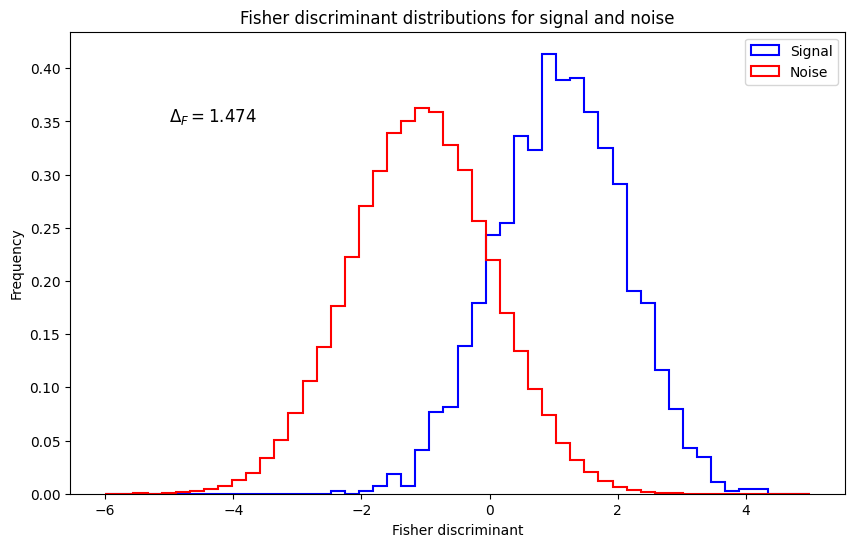

In [59]:
Nbins = 50
xmin = -6
xmax = 5
binwidth = (xmax-xmin)/Nbins


fig, ax = plt.subplots(figsize=(10,6))
hist_signal = ax.hist(fisher_data_signal, bins=Nbins, label="Signal", histtype='step', color='Blue', lw=1.5, range=(xmin,xmax), density=True);
hist_noise = ax.hist(fisher_data_noise, bins=Nbins, label="Noise", histtype='step', color='Red', lw=1.5, range=(xmin,xmax), density=True);
ax.set_xlabel("Fisher discriminant")
ax.set_ylabel(f"Frequency")
ax.legend()
ax.set_title("Fisher discriminant distributions for signal and noise")
ax.text(-5, 0.35, fr'$\Delta_{{F}} = {calc_separation(fisher_data_signal, fisher_data_noise):.3f}$', fontsize=12)

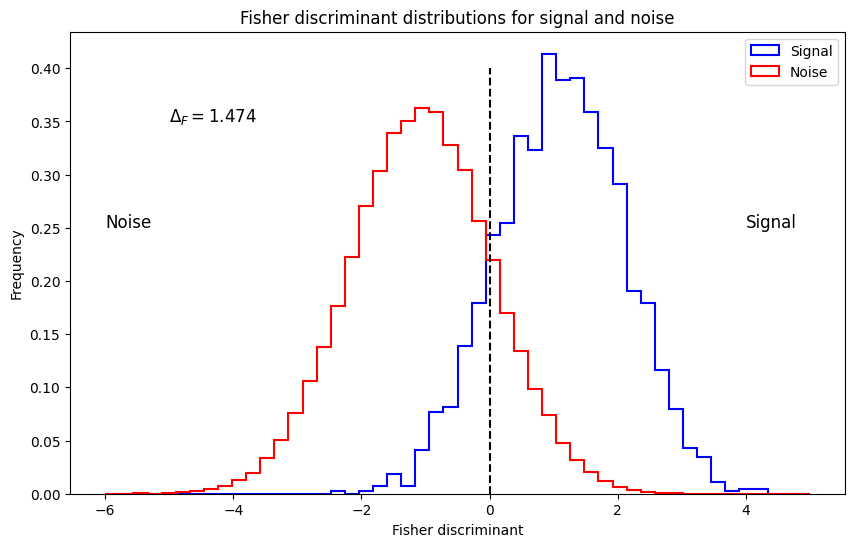

In [60]:
ax.text(-6, 0.25, fr'Noise', fontsize=12)
ax.text(4, 0.25, fr'Signal', fontsize=12)
ax.plot((0,0), (0,0.4), "k--")

fig

In [61]:
data = np.array([P[type!=-1.0], R[type!=-1.0]])
clean_index = []

fisher_data = np.zeros(len(data[0, :]))
for i in range(len(data[0, :])):
    fisher_data[i] = np.dot(wf, data[:, i])
    if fisher_data[i] > 0:
        clean_index.append(i)

In [62]:
clean_freq = np.zeros(len(clean_index))

for i, index in enumerate(clean_index):
    clean_freq[i] = freq[type!=-1][index]

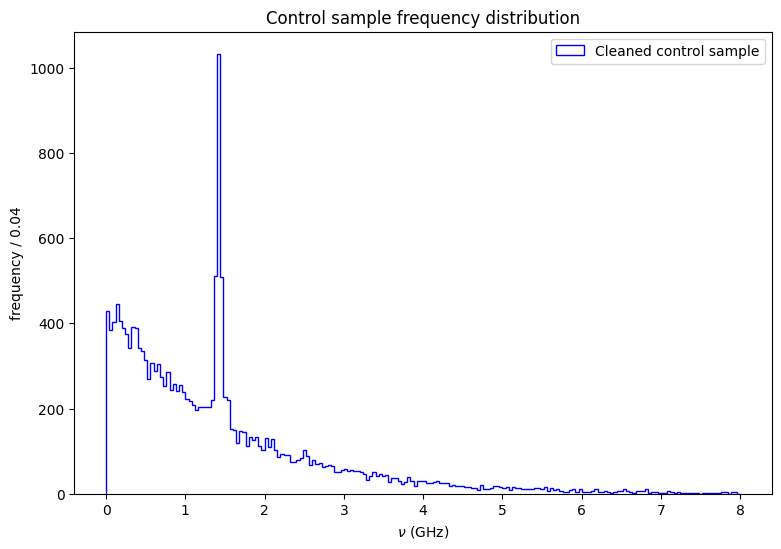

In [63]:
Nbins = 200
xmin = 0
xmax = 8
binwidth = (xmax - xmin) / Nbins

fig, ax = plt.subplots(figsize=(9,6))
ax.hist(clean_freq, bins=Nbins, label="Cleaned control sample", histtype='step', color='Blue', lw=1.0, range=(xmin,xmax));
ax.set(title="Control sample frequency distribution", xlabel=r"$\nu$ (GHz)", ylabel=f"frequency / {binwidth}")
plt.legend()

Fit value: sigma = 0.03091 +/- 0.00107
Fit value: tau = 1.39082 +/- 0.01097
Fit value: N = 709.39990 +/- 5.36124
Fit value: f = 0.09166 +/- 0.00267
Chi2 value: 240.9   Ndof = 193    Prob(Chi2,Ndof) = 0.010820047145889768


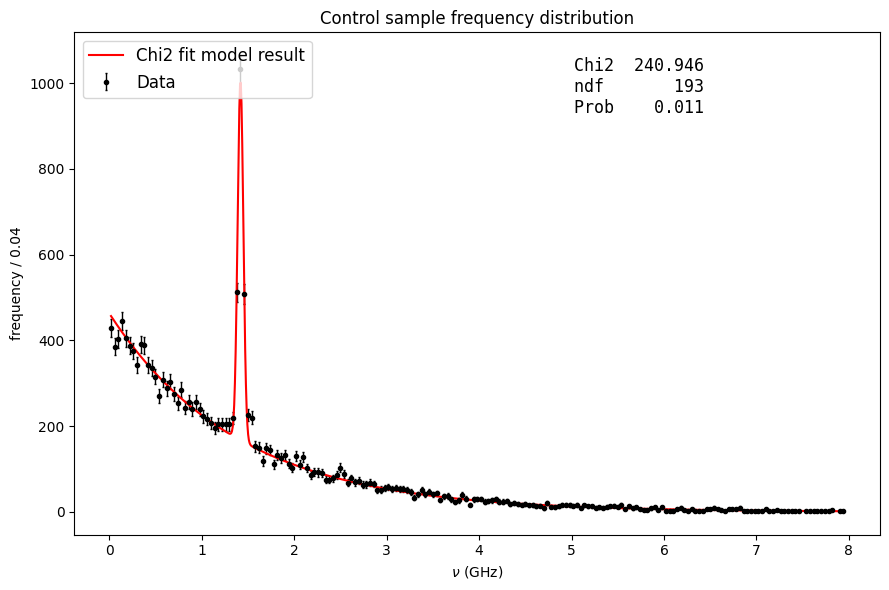

In [64]:
counts, bin_edges = np.histogram(clean_freq, bins=Nbins, range=(xmin, xmax))
x = (bin_edges[1:][counts>0] + bin_edges[:-1][counts>0])/2
y = counts[counts>0]
sy = np.sqrt(counts[counts>0])   # NOTE: We (naturally) assume that the bin count is Poisson distributed.

_ = fit_and_plot(gauss_and_exp_pdf, x, y, sy, {"sigma":0.1, "tau":100, "N":1000, "f":0.01}, [r"$\nu$ (GHz)", f"frequency / {binwidth}", "Control sample frequency distribution"])

Now I work with the unknown dataset:

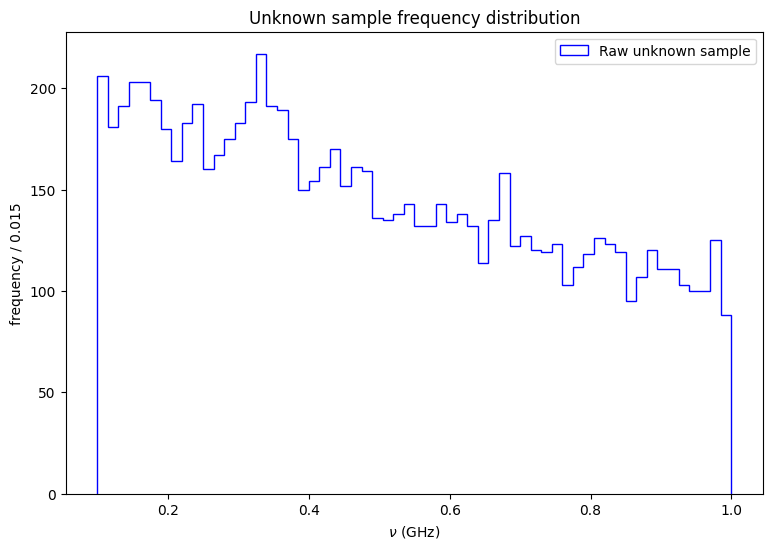

In [65]:
Nbins = 60
xmin = 0.1
xmax = 1.0
binwidth = (xmax - xmin) / Nbins

fig, ax = plt.subplots(figsize=(9,6))
ax.hist(freq[type==-1], bins=Nbins, label="Raw unknown sample", histtype='step', color='Blue', lw=1.0, range=(xmin,xmax));
ax.set(title="Unknown sample frequency distribution", xlabel=r"$\nu$ (GHz)", ylabel=f"frequency / {binwidth:.3f}")
plt.legend()

In [66]:
data_unknown = np.array([P[type==-1.0], R[type==-1.0]])
clean_index = []

fisher_data_unknown = np.zeros(len(data_unknown[0, :]))
for i in range(len(data_unknown[0, :])):
    fisher_data_unknown[i] = np.dot(wf, data_unknown[:, i])
    if fisher_data_unknown[i] > 0:
        clean_index.append(i)

clean_freq_unknown = np.zeros(len(clean_index))

for i, index in enumerate(clean_index):
    clean_freq_unknown[i] = freq[type==-1][index]

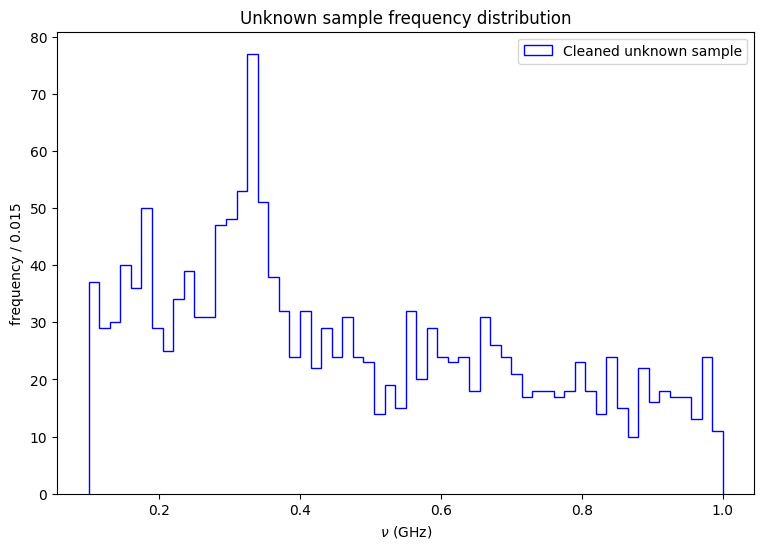

In [67]:
Nbins = 60
xmin = 0.1
xmax = 1
binwidth = (xmax - xmin) / Nbins

fig, ax = plt.subplots(figsize=(9,6))
ax.hist(clean_freq_unknown, bins=Nbins, label="Cleaned unknown sample", histtype='step', color='Blue', lw=1.0, range=(xmin,xmax));
ax.set(title="Unknown sample frequency distribution", xlabel=r"$\nu$ (GHz)", ylabel=f"frequency / {binwidth:.3f}")
plt.legend()

Fit value: mu = 0.32752 +/- 0.00404
Fit value: sigma = 0.02420 +/- 0.00429
Fit value: tau = 1.00959 +/- 0.11265
Fit value: N = 41.73012 +/- 2.47774
Fit value: f = 0.05193 +/- 0.00804
Chi2 value: 62.2   Ndof = 55    Prob(Chi2,Ndof) = 0.23396726652641178


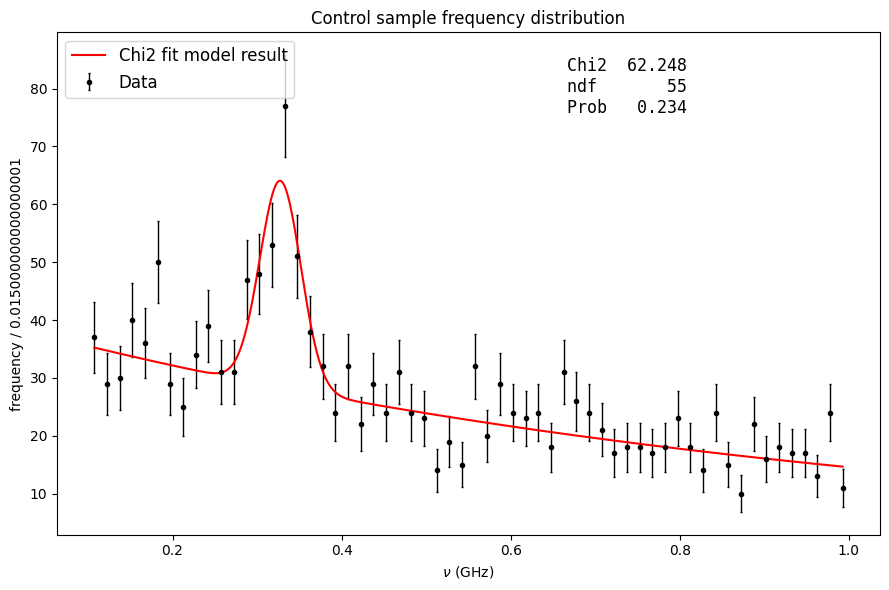

In [68]:
def gauss_and_exp_pdf2(x, mu, sigma, tau, N, f) :
    """Gaussian peak and exponential background"""
    return  N * (f / np.sqrt(2*np.pi) / sigma * np.exp( -0.5 * (x-mu)**2 / sigma**2) + (1-f) / tau * np.exp(-x/tau))

counts, bin_edges = np.histogram(clean_freq_unknown, bins=Nbins, range=(xmin, xmax))
x = (bin_edges[1:][counts>0] + bin_edges[:-1][counts>0])/2
y = counts[counts>0]
sy = np.sqrt(counts[counts>0])   # NOTE: We (naturally) assume that the bin count is Poisson distributed.

par, error = fit_and_plot(gauss_and_exp_pdf2, x, y, sy, {"mu":0.3, "sigma":0.1, "tau":1, "N":50, "f":0.01}, [r"$\nu$ (GHz)", f"frequency / {binwidth}", "Control sample frequency distribution"])

The number of signal entries in the unknown dataset is: 3528


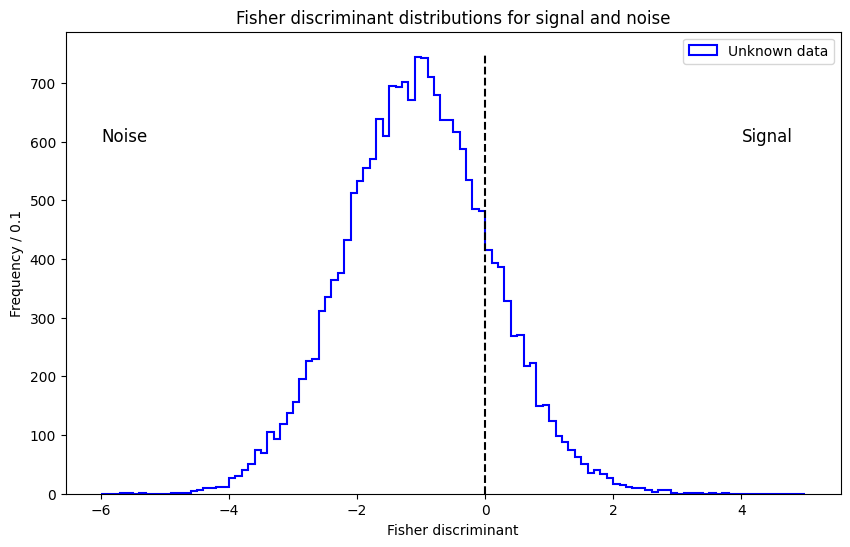

In [69]:
Nbins = 110
xmin = -6
xmax = 5
binwidth = (xmax-xmin)/Nbins

print(f"The number of signal entries in the unknown dataset is: {len(fisher_data_unknown[fisher_data_unknown>0])}")


fig, ax = plt.subplots(figsize=(10,6))
hist_unknown = ax.hist(fisher_data_unknown, bins=Nbins, label="Unknown data", histtype='step', color='Blue', lw=1.5, range=(xmin,xmax));
ax.set_xlabel("Fisher discriminant")
ax.set_ylabel(f"Frequency / {binwidth}")
ax.legend()
ax.set_title("Fisher discriminant distributions for signal and noise")
ax.text(-6, 600, fr'Noise', fontsize=12)
ax.text(4, 600, fr'Signal', fontsize=12)
ax.plot((0,0), (0,750), "k--")

### Problem 5.2

In [70]:
dataframe = pd.read_csv('data_DecayTimes.csv', header=None)
times = dataframe.values.T[0]

Text(0.5, 1.0, 'Distribution of decay times for Bohrium isotope')

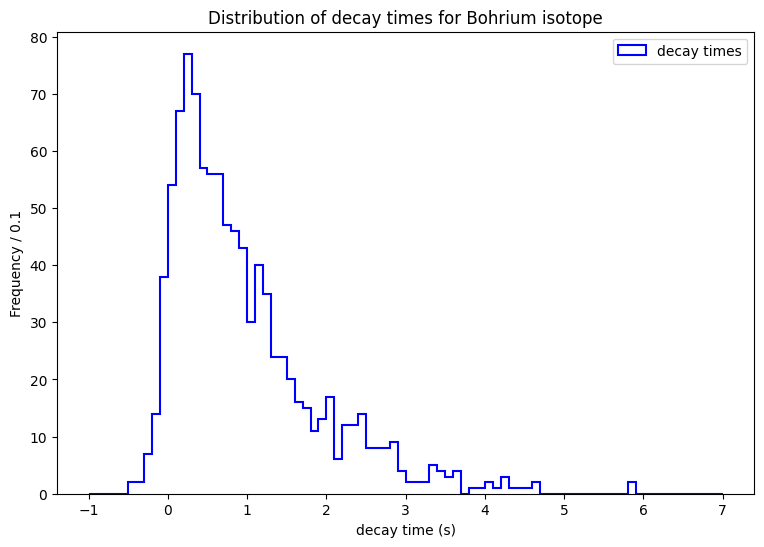

In [71]:
Nbins = 80
xmin = -1
xmax = 7
binwidth = (xmax-xmin)/Nbins

fig, ax = plt.subplots(figsize=(9,6))
ax.hist(times, bins=Nbins, label="decay times", histtype='step', color='Blue', lw=1.5, range=(xmin,xmax));
ax.set_xlabel("decay time (s)")
ax.set_ylabel(f"Frequency / {binwidth}")
ax.legend()
ax.set_title("Distribution of decay times for Bohrium isotope")

In [72]:
mean = np.mean(times)
RMS = np.std(times, ddof=1)
sig_mean = RMS / np.sqrt(len(times))

print(f"The mean is: {mean:.5f} +- {sig_mean:.5f}")

The mean is: 0.96311 +- 0.03021


In [73]:
median = np.median(times)
sig_median = np.sqrt(np.pi/2) * sig_mean

print(f"The median is: {median:.5f} +- {sig_median:.5f}")

The median is: 0.70008 +- 0.03786


In [74]:
# exponential fit to tail

xmin = 2
xmax = 7

def exp(x, tau, N) :
    """Exponential"""
    return  len(times) * N / tau * np.exp(-x/tau)


ullhfit = UnbinnedLH(exp, times, bound=(xmin, xmax), extended=True)
minuit_ullh = Minuit(ullhfit, tau=1.0, N=0.1)
minuit_ullh.errordef = 0.5     # Value for likelihood fits
minuit_ullh.migrad()           # Perform the actual fit

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -421.1                     │              Nfcn = 111              │
│ EDM = 6.66e-07 (Goal: 0.0001)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ tau  │   0.86    │   0.08    │            │            │         │         │       │
│ 1 │ N    │   1.40    │   0.34    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────┐
│     │     tau       N │
├─────┼─────────────────┤
│ tau │ 0.00714  -0.026 │
│   N │  -0.026   0.112 │
└─────┴─────────────────┘

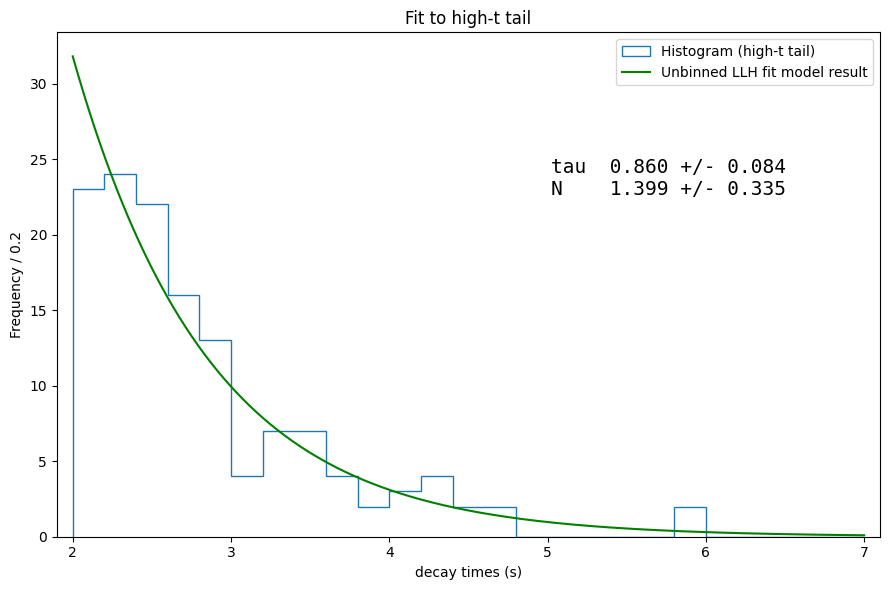

In [75]:
Nbins = 25
binwidth = (xmax-xmin)/Nbins


fig, ax = plt.subplots(figsize=(9, 6))
ax.hist(times, bins=Nbins, range=(xmin, xmax), histtype='step', label='Histogram (high-t tail)' )
ax.set(xlabel="decay times (s)", ylabel=f"Frequency / {binwidth}", xlim=(xmin-0.1, xmax+0.1), title="Fit to high-t tail");

x_axis = np.linspace(xmin, xmax, 1000)

ax.plot(x_axis, binwidth*exp(x_axis, *minuit_ullh.values[:]), '-g', label='Unbinned LLH fit model result')

# Define figure text
d = {'tau':   [minuit_ullh.values['tau'], minuit_ullh.errors['tau']],
     'N':   [minuit_ullh.values['N'], minuit_ullh.errors['N']]
    }

# Plot figure text
text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.6, 0.75, text, ax, fontsize=14)

# Add legend
ax.legend(loc='best')
fig.tight_layout()

Fit value: sigma = 0.97606 +/- 0.06096
Fit value: tau = 1.53142 +/- 0.38222
Fit value: N = 146.77660 +/- 14.95254
Fit value: f = 0.75196 +/- 0.11255
Chi2 value: 38.6   Ndof = 43    Prob(Chi2,Ndof) = 0.6624108286123432


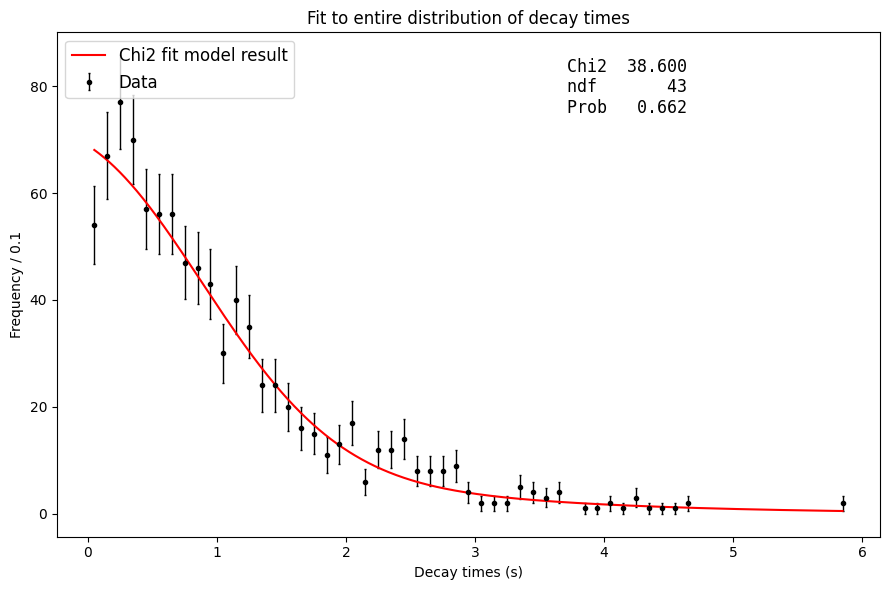

In [76]:
# fit to whole range (t>=0)

def gauss_and_exp(x, sigma, tau, N, f) :
    """Gaussian and exponential"""
    mu = 0
    return  N * ( f / np.sqrt(2*np.pi) / sigma * np.exp( -0.5 * (x-mu)**2 / sigma**2) + (1-f) / tau * np.exp(-x/tau))

xmin = 0
xmax = 7
Nbins = 70
binwidth = (xmax - xmin) / Nbins

counts, bin_edges = np.histogram(times[times>=0], bins=Nbins, range=(xmin, xmax))
x = (bin_edges[1:][counts>0] + bin_edges[:-1][counts>0])/2
y = counts[counts>0]
sy = np.sqrt(counts[counts>0])   # NOTE: We (naturally) assume that the bin count is Poisson distributed.

xaxis = np.linspace(1, 41, 1000)


_ = fit_and_plot(gauss_and_exp, x, y, sy, {"sigma":1.0, "tau":0.86, "N":150, "f":0.8}, ["Decay times (s)", f"Frequency / {binwidth}", "Fit to entire distribution of decay times"])
